## A complete example on classification and further analysis of metrics

Loading a dataset concerning the classification of breast cancer

### Loading Data

In [2]:
import pandas as pd

#reading data. Notice NaN are encoded as '?' on the dataset so we deal with it during load
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None, na_values='?')

cols = ['id','thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df.columns = cols
df = df.drop('id',axis=1)

print(df.shape)
df.head(5)

(699, 10)


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


### Dealing with missing data

In [3]:
print("Checking existence of nans: ", df.isnull().values.any())
print(df[df.isnull().values])
print("\n")
print(df.nuclei.value_counts())

Checking existence of nans:  True
     thickness  size  shape  adhesion  epithelial  nuclei  chromatin  \
23           8     4      5         1           2     NaN          7   
40           6     6      6         9           6     NaN          7   
139          1     1      1         1           1     NaN          2   
145          1     1      3         1           2     NaN          2   
158          1     1      2         1           3     NaN          1   
164          5     1      1         1           2     NaN          3   
235          3     1      4         1           2     NaN          3   
249          3     1      1         1           2     NaN          3   
275          3     1      3         1           2     NaN          2   
292          8     8      8         1           2     NaN          6   
294          1     1      1         1           2     NaN          2   
297          5     4      3         1           2     NaN          2   
315          4     6      5   

In [4]:
df = df.fillna(df.mean())

print(df.nuclei.value_counts())

print("\nChecking for nans:", df.isnull().values.any())

1.000000     402
10.000000    132
5.000000      30
2.000000      30
3.000000      28
8.000000      21
4.000000      19
3.544656      16
9.000000       9
7.000000       8
6.000000       4
Name: nuclei, dtype: int64

Checking for nans: False


### Splitting Train/Test data

In [5]:
y = df["status"]
X = df.drop("status", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

print("Training Data")
print(X_train.shape)
print(y_train.shape)

print("\n")

print("Test Data")
print(X_test.shape)
print(y_test.shape)

Training Data
(419, 9)
(419,)


Test Data
(280, 9)
(280,)


In [6]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [8]:
# score against the test dataset
logreg.score(X_test, y_test)

0.9464285714285714

**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

Classification values:
- 2 means benign
- 4 means malignant

In [9]:
print (y_test.value_counts())

2    183
4     97
Name: status, dtype: int64


In [10]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

2    0.653571
Name: status, dtype: float64

In [11]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [4 2 2 2 4 2 2 4 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 4 2]
Pred: [4 2 2 2 4 2 4 4 2 4 2 2 2 2 4 2 2 2 4 2 2 2 2 4 2]


In [12]:
print ('In this case we are predicting as malignant an actually benign tumor -> that is better than the alternative')
print ('True:', y_test.values[6])
print ('Pred:', y_pred_class[6])

In this case we are predicting as malignant an actually benign tumor -> that is better than the alternative
True: 2
Pred: 4


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion Matrix

In [13]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
confusion = metrics.confusion_matrix(y_test, y_pred_class)

print (confusion)

[[175   8]
 [  7  90]]


### Interpreting the matrix

- Negative is a benign tumor (coded as 2)
- Positive is a malignant tumor (coded as 4)
- Rows represent the truth
- Columns are the predictions
- Every observation in the testing set is represented in exactly one box

In [14]:
print("Actual Negatives: ", confusion[0,0] + confusion[0,1], " must be equal to: ", len(y_test[y_test == 2]))
print("Actual Positives: ", confusion[1,0] + confusion[1,1], " must be equal to: ", len(y_test[y_test == 4]))

print("Predicted Negatives: ", confusion[0,0] + confusion[1,0], " must be equal to: ", len(y_pred_class[y_pred_class == 2]))
print("Predicted Positives: ", confusion[0,1] + confusion[1,1], " must be equal to: ", len(y_pred_class[y_pred_class == 4]))

Actual Negatives:  183  must be equal to:  183
Actual Positives:  97  must be equal to:  97
Predicted Negatives:  182  must be equal to:  182
Predicted Positives:  98  must be equal to:  98


![confusion matrix](images/confusion.png)

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error

[182  98]
[183  97]


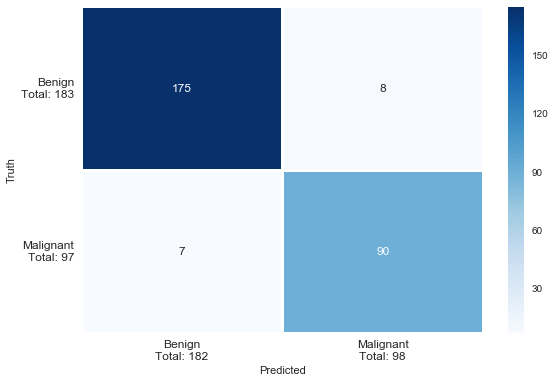

In [97]:

def plotConfusionMatrix(confusionMatrix, labels):

    #plotting the confusion matrix
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True,annot_kws={"size": 12} ,linewidths=2, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')

    xtick_labels = list()
    ytick_labels = list()
    xtick_totals = np.sum(confusionMatrix, axis=0)
    ytick_totals = np.sum(confusionMatrix, axis=1)

    print (xtick_totals)
    print (ytick_totals)

    for i in range(len(labels)):
        xtick_labels.append("{0}\nTotal: {1}".format(labels[i], xtick_totals[i]))
        ytick_labels.append("{0}\nTotal: {1}".format(labels[i], ytick_totals[i]))
        
    ax.set_xticklabels(xtick_labels, rotation='horizontal', ha='center', size=12)
    ax.set_yticklabels(ytick_labels, rotation='horizontal', va='center', size=12)
    
    plt.show()

plotConfusionMatrix(confusion,['Benign','Malignant'])

## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [16]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.946428571429
0.946428571429


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [17]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0535714285714
0.0535714285714


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [18]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class, pos_label=4))

0.927835051546
0.927835051546


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [19]:
print(TN / float(TN + FP))

0.956284153005


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [20]:
print(FP / float(TN + FP))

0.0437158469945


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [21]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class, pos_label=4))

0.918367346939
0.918367346939


**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)